In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Ryank\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


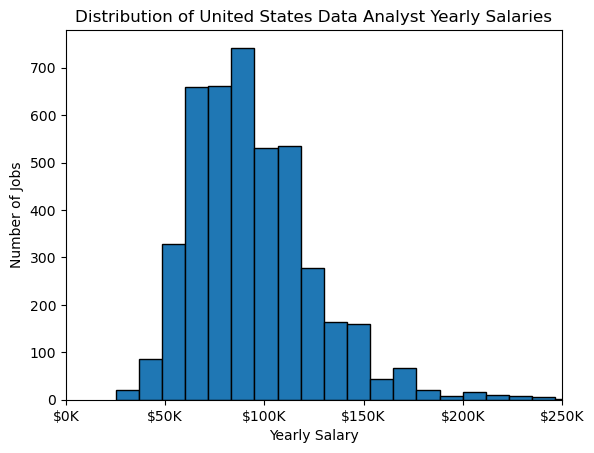

In [12]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')
plt.xlim(0,250000)

ax = plt.gca() #get current axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()

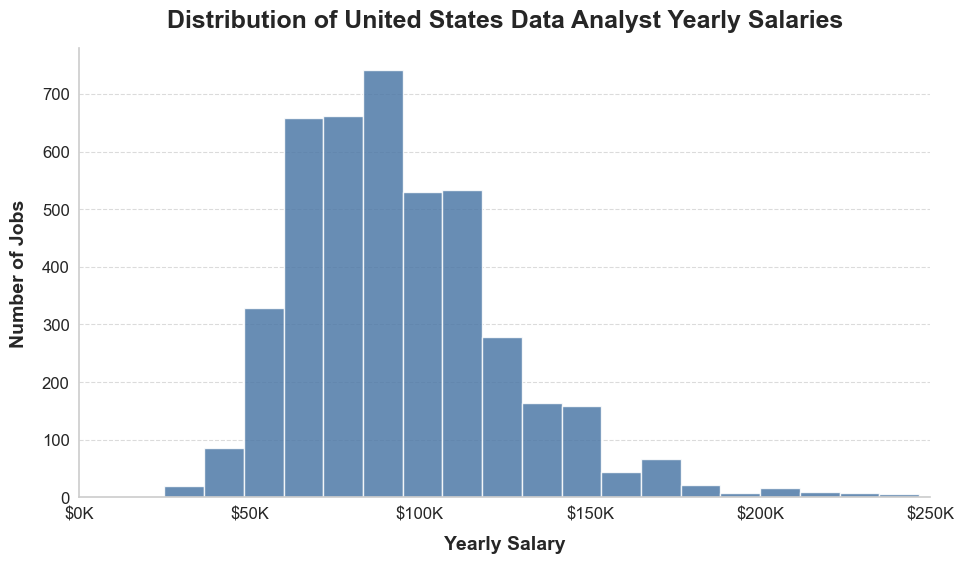

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')  # This sets the grid style for all plots

fig, ax = plt.subplots(figsize=(10, 6))

df_DA_US['salary_year_avg'].plot(
    kind='hist',
    bins=30,
    edgecolor='white',
    color='#4e79a7',  # Tableau blue
    alpha=0.85,
    ax=ax
)

ax.set_xlim(0, 250000)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.grid(axis='x', visible=False)
ax.tick_params(top=False, right=False, labelsize=12)

ax.set_title('Distribution of United States Data Analyst Yearly Salaries', fontsize=18, weight='bold', pad=15)
ax.set_xlabel('Yearly Salary', fontsize=14, labelpad=10, weight='bold')
ax.set_ylabel('Number of Jobs', fontsize=14, labelpad=10, weight='bold')

plt.tight_layout(pad=2)
plt.show()